#**Unduh dan Ekstraksi Dataset**

**Unggah file kaggle.json**

In [1]:
from google.colab import files
files.upload()

Saving fresh-and-stale-classification-metadata.json to fresh-and-stale-classification-metadata.json


{'fresh-and-stale-classification-metadata.json': b'{"@context":{"@language":"en","@vocab":"https://schema.org/","citeAs":"cr:citeAs","column":"cr:column","conformsTo":"dct:conformsTo","cr":"http://mlcommons.org/croissant/","data":{"@id":"cr:data","@type":"@json"},"dataBiases":"cr:dataBiases","dataCollection":"cr:dataCollection","dataType":{"@id":"cr:dataType","@type":"@vocab"},"dct":"http://purl.org/dc/terms/","extract":"cr:extract","field":"cr:field","fileProperty":"cr:fileProperty","fileObject":"cr:fileObject","fileSet":"cr:fileSet","format":"cr:format","includes":"cr:includes","isEnumeration":"cr:isEnumeration","isLiveDataset":"cr:isLiveDataset","jsonPath":"cr:jsonPath","key":"cr:key","md5":"cr:md5","parentField":"cr:parentField","path":"cr:path","personalSensitiveInformation":"cr:personalSensitiveInformation","recordSet":"cr:recordSet","references":"cr:references","regex":"cr:regex","repeated":"cr:repeated","replace":"cr:replace","sc":"https://schema.org/","separator":"cr:separator

**Setel Konfigurasi Kaggle**

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Unduh Dataset**

In [3]:
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification

Dataset URL: https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification
License(s): Community Data License Agreement - Permissive - Version 1.0
100% 2.84G/2.84G [01:46<00:00, 30.8MB/s]
100% 2.84G/2.84G [01:46<00:00, 28.6MB/s]


**Ekstraksi Dataset**

In [4]:
import zipfile
local_zip = '/content/fresh-and-stale-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/fresh-and-stale-classification')
zip_ref.close()

# **Gathering Dataset**

In [5]:
import os
base_dir = '/content/fresh-and-stale-classification'
# Cek isi folder utama untuk memastikan 'test' ada
print("Isi dari base_dir:", os.listdir(base_dir))

Isi dari base_dir: ['dataset']


In [6]:
import os

base_dir = '/content/fresh-and-stale-classification'
test_dir = os.path.join(base_dir, 'dataset/Test') # Define test_dir here

# Cek isi folder utama dan folder test
print("Isi dari base_dir:", os.listdir(base_dir))
print("Isi dari test_dir:", os.listdir(test_dir))

total_test = 0

for i in os.listdir(test_dir):
    total_test += len(os.listdir(os.path.join(test_dir, i))) # Use os.path.join for safer path construction
    print('Total File', i, '=', len(os.listdir(os.path.join(test_dir, i))))

print(total_test)

Isi dari base_dir: ['dataset']
Isi dari test_dir: ['rottenpatato', 'rottenokra', 'rottencucumber', 'freshpatato', 'freshcucumber', 'freshokra', 'freshbanana', 'freshoranges', 'freshtamto', 'freshapples', 'rottenbanana', 'rottenoranges', 'rottenapples', 'rottentamto']
Total File rottenpatato = 370
Total File rottenokra = 224
Total File rottencucumber = 255
Total File freshpatato = 270
Total File freshcucumber = 279
Total File freshokra = 370
Total File freshbanana = 892
Total File freshoranges = 388
Total File freshtamto = 255
Total File freshapples = 791
Total File rottenbanana = 900
Total File rottenoranges = 403
Total File rottenapples = 988
Total File rottentamto = 353
6738


In [7]:
import os

base_dir = '/content/fresh-and-stale-classification'
train_dir = os.path.join(base_dir, 'dataset/Train') # Define train_dir here, similar to how test_dir was defined

total_train = 0

for i in os.listdir(train_dir):
    total_train += len(os.listdir(os.path.join(train_dir, i))) # Use os.path.join for safer path construction
    print('Total File', i, '=', len(os.listdir(os.path.join(train_dir, i))))

print(total_train)

Total File rottenokra = 338
Total File rottencucumber = 421
Total File rottenpotato = 802
Total File freshcucumber = 496
Total File freshokra = 635
Total File freshbanana = 2468
Total File rottenbittergroud = 357
Total File freshpotato = 536
Total File freshoranges = 1466
Total File freshapples = 2424
Total File rottenbanana = 2932
Total File freshbittergroud = 327
Total File freshtomato = 1858
Total File rottenoranges = 1595
Total File rottenapples = 3248
Total File rottencapsicum = 901
Total File rottentomato = 1825
Total File freshcapsicum = 990
23619


In [8]:
total = 0
total = total_train + total_test
print('Total File Dataset :', total)

Total File Dataset : 30357


In [9]:
os.listdir(test_dir)

['rottenpatato',
 'rottenokra',
 'rottencucumber',
 'freshpatato',
 'freshcucumber',
 'freshokra',
 'freshbanana',
 'freshoranges',
 'freshtamto',
 'freshapples',
 'rottenbanana',
 'rottenoranges',
 'rottenapples',
 'rottentamto']

In [10]:
os.listdir(train_dir)

['rottenokra',
 'rottencucumber',
 'rottenpotato',
 'freshcucumber',
 'freshokra',
 'freshbanana',
 'rottenbittergroud',
 'freshpotato',
 'freshoranges',
 'freshapples',
 'rottenbanana',
 'freshbittergroud',
 'freshtomato',
 'rottenoranges',
 'rottenapples',
 'rottencapsicum',
 'rottentomato',
 'freshcapsicum']

#**Assesing Data**

In [11]:
import os

# Path ke folder gambar
image_folder_path = '/content/fresh-and-stale-classification'

# Mengecek folder kelas
classes = os.listdir(image_folder_path)
print("Classes in dataset:", classes)

# Mengecek jumlah file di setiap kelas
for cls in classes:
    cls_path = os.path.join(image_folder_path, cls)
    num_files = len(os.listdir(cls_path))
    print(f"Number of images in {cls}: {num_files}")


Classes in dataset: ['dataset']
Number of images in dataset: 2


In [12]:
import os
import pandas as pd

# Path ke folder utama
dataset_path = '/content/fresh-and-stale-classification'

# List semua kelas (subfolder)
classes = os.listdir(dataset_path)

# List semua file dan buat tabel
data = []
for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    if os.path.isdir(cls_path):  # Cek apakah ini folder (kelas)
        for file in os.listdir(cls_path):
            file_path = os.path.join(cls_path, file)
            data.append({'file_path': file_path, 'label': cls})

# Konversi ke DataFrame
df_images = pd.DataFrame(data)

# Menampilkan dataset gambar
print("Dataset Overview:")
print(df_images.head())  # Menampilkan 5 baris pertama
print("\nNumber of Images per Class:")
print(df_images['label'].value_counts())  # Jumlah gambar per kelas


Dataset Overview:
                                           file_path    label
0  /content/fresh-and-stale-classification/datase...  dataset
1  /content/fresh-and-stale-classification/datase...  dataset

Number of Images per Class:
label
dataset    2
Name: count, dtype: int64


**Check Missing Value**

In [13]:
# Cek missing values per kolom
missing_values = df_images.isnull().sum() # Changed 'df' to 'df_images'
print("Missing values per column:\n", missing_values)

# Jika ingin persentase missing values:
missing_percentage = (df_images.isnull().sum() / len(df_images)) * 100 # Changed 'df' to 'df_images'
print("Missing values percentage:\n", missing_percentage)


Missing values per column:
 file_path    0
label        0
dtype: int64
Missing values percentage:
 file_path    0.0
label        0.0
dtype: float64


**Check Invalid Data**

In [14]:
# Contoh: kolom 'age' harus positif
# invalid_age = df[df['age'] < 0] # Original code using 'df'
invalid_age = df_images[df_images['file_path'].str.contains('freshapples')] # Changed 'df' to 'df_images' and 'age' to 'file_path'
print("Invalid age values:\n", invalid_age)

# Contoh: kolom kategori memiliki nilai yang tidak sesuai
valid_categories = ['fresh', 'stale']
# invalid_categories = df[~df['category'].isin(valid_categories)] # Original code using 'df'
invalid_categories = df_images[~df_images['label'].isin(valid_categories)] # Changed 'df' to 'df_images' and 'category' to 'label'
print("Invalid categories:\n", invalid_categories)

Invalid age values:
 Empty DataFrame
Columns: [file_path, label]
Index: []
Invalid categories:
                                            file_path    label
0  /content/fresh-and-stale-classification/datase...  dataset
1  /content/fresh-and-stale-classification/datase...  dataset


**Check Data Duplikasi**

In [15]:
# Cek jumlah duplikasi
num_duplicates = df_images.duplicated().sum() # Changed 'df' to 'df_images'
print(f"Number of duplicated rows: {num_duplicates}")

# Menampilkan data duplikasi
duplicate_rows = df_images[df_images.duplicated()] # Changed 'df' to 'df_images'
print("Duplicated rows:\n", duplicate_rows)

# Hapus duplikasi
df_images = df_images.drop_duplicates() # Changed 'df' to 'df_images'

Number of duplicated rows: 0
Duplicated rows:
 Empty DataFrame
Columns: [file_path, label]
Index: []


#**Exploratory Data Analysis (EDA)**

**Menampilkan Contoh Gambar Dari Dataset**

Folder target: /content/fresh-and-stale-classification/dataset/Train/freshapples
Random image selected: translation_Screen Shot 2018-06-08 at 5.22.27 PM.png
Ukuran Gambar: (192, 174)


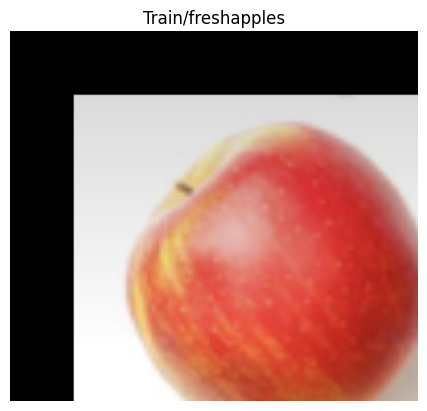

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
from PIL import Image

def view_random_image(target_dir, target_class):
    # Gabungkan direktori target dan kelas
    target_folder = os.path.join(target_dir, target_class)
    print(f"Folder target: {target_folder}")  # Cek folder yang dibentuk

    # Periksa apakah folder ada
    if not os.path.exists(target_folder):
        print(f"Folder {target_folder} tidak ditemukan.")
        return

    # Ambil daftar file gambar (bukan folder)
    image_files = [f for f in os.listdir(target_folder) if os.path.isfile(os.path.join(target_folder, f))]

    # Periksa apakah ada file gambar
    if len(image_files) == 0:
        print(f"Tidak ada file gambar di folder {target_folder}.")
        return

    # Pilih gambar acak
    random_image = random.sample(image_files, 1)

    # Cek apakah gambar ditemukan
    print(f"Random image selected: {random_image[0]}")

    # Coba buka gambar dengan PIL untuk memastikan formatnya benar
    img_path = os.path.join(target_folder, random_image[0])

    try:
        img = Image.open(img_path)
        img.show()  # Menampilkan gambar menggunakan PIL
        print(f"Ukuran Gambar: {img.size}")  # Ukuran gambar (PIL)

        # Konversi gambar PIL ke numpy array untuk plt
        img = img.convert('RGB')
        plt.imshow(img)
        plt.title(target_class)
        plt.axis('off')
        plt.show()  # Pastikan gambar muncul
    except Exception as e:
        print(f"Gagal membuka gambar: {e}")

# Panggil fungsi untuk melihat gambar acak
view_random_image('/content/fresh-and-stale-classification/dataset', 'Train/freshapples')  # Ganti 'Train/freshapples' sesuai dengan struktur Anda


#**Pembuatan Model**

In [17]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255
)
val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [20]:
train_data_rf = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 15,
    target_size = (224, 224),
    class_mode = 'categorical',
)
val_data_rf = val_datagen.flow_from_directory(
    test_dir,
    batch_size = 15,
    target_size = (224, 224),
    class_mode = 'categorical',
)

Found 23619 images belonging to 18 classes.
Found 6738 images belonging to 14 classes.


In [28]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)), # Changed input_shape to (224, 224, 3)
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(18, activation='softmax')  # Sesuaikan dengan jumlah kelas
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25, 25, 256)         │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 160000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 18)                  │       2,880,018 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,962,226 (11.30 MB)

 Trainable params: 2,962,226 (11.30 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Untuk target one-hot encoded
    metrics=['accuracy']
)


In [ ]:
hist = model.fit(
    train_data_rf,
    epochs = 15,
    validation_data = val_data_rf,
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  66/1575 ━━━━━━━━━━━━━━━━━━━━ 35:07 1s/step - accuracy: 0.1920 - loss: 2.6591